In [1]:
import numpy as np
import pandas as pd

ratings_df = pd.read_csv('../../data/Ratings_Time.csv', delimiter=';', dtype={'User-ID': np.int32, 'ISBN': str, 'Rating': np.int8, 'timestamp': str})
print("Total ratings:", ratings_df.shape[0])

ratings_df = ratings_df.dropna()
ratings_df = ratings_df.drop_duplicates()

print("Total ratings (dropna, duplicates):", ratings_df.shape[0])

ratings_df = ratings_df[ratings_df['Rating'] != 0]

print("Total ratings (drop zeroes):", ratings_df.shape[0])

ratings_df = ratings_df.sort_values(by=['User-ID', 'timestamp'])

Total ratings: 1149780
Total ratings (dropna, duplicates): 1149780
Total ratings (drop zeroes): 433671


/var/folders/yn/16crnc792zg2yr78zf0qg0j40000gq/T/ipykernel_35542/3787064078.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_averages = user_rating_counts.groupby(user_rating_counts_bins).count()


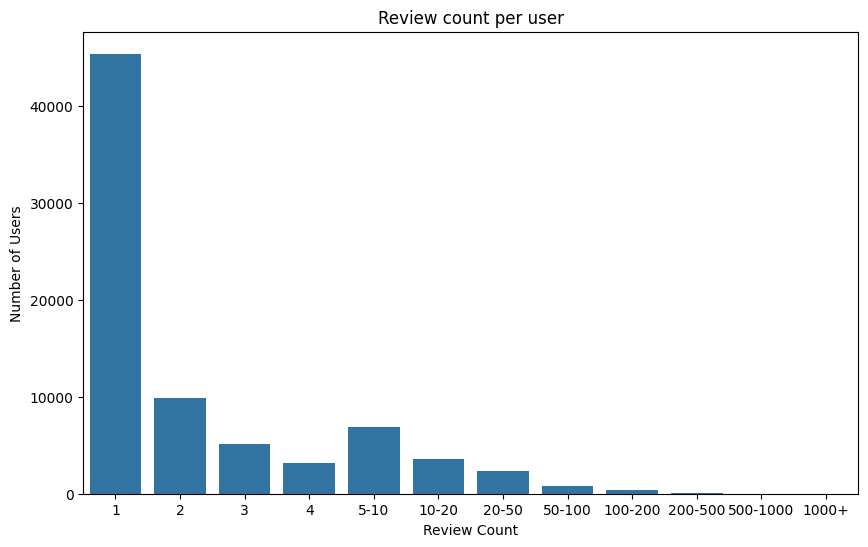

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

user_rating_counts = ratings_df.groupby('User-ID').size()
rating_distribution = user_rating_counts.value_counts().sort_index()

bins = [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 1000, 10000]  # Adjust as needed
labels = ['1', '2', '3', '4', '5-10', '10-20', '20-50', '50-100', '100-200', '200-500', '500-1000', '1000+']

user_rating_counts_bins = pd.cut(user_rating_counts, bins=bins, labels=labels, right=False)

bin_averages = user_rating_counts.groupby(user_rating_counts_bins).count()

plt.figure(figsize=(10, 6))
sns.barplot(x=bin_averages.index, y=bin_averages.values)

# Set labels and title
plt.xlabel('Review Count')
plt.ylabel('Number of Users')
plt.title('Review count per user')

# Show the plot
plt.show()

/var/folders/yn/16crnc792zg2yr78zf0qg0j40000gq/T/ipykernel_35542/4217186168.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_averages = rating_counts.groupby(rating_counts_bins).count()


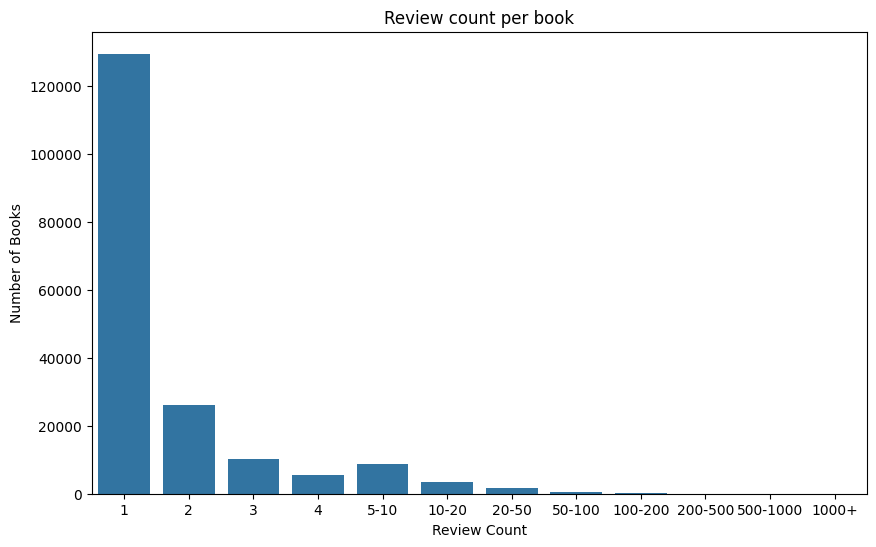

count    185973.000000
mean          2.331903
std           6.834667
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         707.000000
dtype: float64

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

rating_counts = ratings_df.groupby('ISBN').size()

bins = [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 1000, 10000]  # Adjust as needed
labels = ['1', '2', '3', '4', '5-10', '10-20', '20-50', '50-100', '100-200', '200-500', '500-1000', '1000+']

rating_counts_bins = pd.cut(rating_counts, bins=bins, labels=labels, right=False)
bin_averages = rating_counts.groupby(rating_counts_bins).count()

plt.figure(figsize=(10, 6))
sns.barplot(x=bin_averages.index, y=bin_averages.values)

# Set labels and title
plt.xlabel('Review Count')
plt.ylabel('Number of Books')
plt.title('Review count per book')

# Show the plot
plt.show()

rating_counts.describe()